In [1]:
import torch
import sys
sys.path.insert(0, './core')
sys.path.insert(0, './models')
import DAELightTransferDataLoader as lightDL
import torchvision.utils as tutils
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
data_root = '../data/multipie_select_batches'

In [2]:
training_data = []
training_data.append(data_root + '/session01_01_select')
training_data.append(data_root + '/session01_02_select')
training_data.append(data_root + '/session01_03_select')
training_data.append(data_root + '/session01_04_select')
training_data.append(data_root + '/session01_05_select')
training_data.append(data_root + '/session01_06_select')
training_data.append(data_root + '/session01_07_select')

training_mask = []
training_mask.append(data_root + '/session01_masks')

transform = transforms.Compose([
            #transforms.Resize(),
            transforms.ToTensor(),
            transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ])

data_set = lightDL.FareMultipieLightingTripletsFrontal(None, root=training_data, root_mask = training_mask, transform = None, resize=64)

print(len(data_set))

data_loader = torch.utils.data.DataLoader(data_set, batch_size = 64, shuffle = True)

['../data/multipie_select_batches/session01_01_select', '../data/multipie_select_batches/session01_02_select', '../data/multipie_select_batches/session01_03_select', '../data/multipie_select_batches/session01_04_select', '../data/multipie_select_batches/session01_05_select', '../data/multipie_select_batches/session01_06_select', '../data/multipie_select_batches/session01_07_select']
../data/multipie_select_batches/session01_01_select session01
../data/multipie_select_batches/session01_02_select session01
../data/multipie_select_batches/session01_03_select session01
../data/multipie_select_batches/session01_04_select session01
../data/multipie_select_batches/session01_05_select session01
../data/multipie_select_batches/session01_06_select session01
../data/multipie_select_batches/session01_07_select session01
['../data/multipie_select_batches/session01_masks']
../data/multipie_select_batches/session01_masks session01
Image Mask:  {'session01': {('036', '01'): '../data/multipie_select_ba

In [5]:
data = iter(data_loader)
s1, img1, s2, img2 = next(data)
print(img1.shape)

torch.Size([64, 64, 64, 3])


In [6]:
img1 = img1.permute(0, 3, 1, 2)
img2 = img2.permute(0, 3, 1, 2)

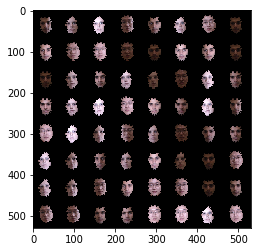

In [7]:
grid = tutils.make_grid(img1, nrow=8, padding=2)
# ndarr = grid.mul(255).clamp(0, 255).byte().permute(1, 2, 0).cpu().numpy()
ndarr = grid.permute(1, 2, 0).cpu().numpy()
im = Image.fromarray(ndarr)
plt.imshow(im)
plt.show()

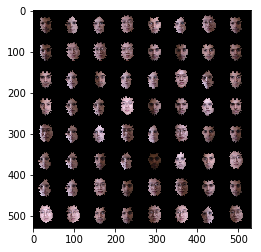

In [8]:
grid = tutils.make_grid(img2, nrow=8, padding=2)
#ndarr = grid.mul(255).clamp(0, 255).byte().permute(1, 2, 0).cpu().numpy()
ndarr = grid.permute(1, 2, 0).cpu().numpy()
im = Image.fromarray(ndarr)
plt.imshow(im)
plt.show()